<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [25]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 151.7 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [5]:
## Write your code here
df_duplicates = df[df.duplicated()]
print(len(df_duplicates))
df_duplicates.head()

0


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


##### Task 2: Remove the duplicate rows from the dataframe.



In [6]:
## Write your code here
df_no_duplicates = df.drop_duplicates()
print(len(df))
print(len(df_no_duplicates))
df = df_no_duplicates

65437
65437


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [9]:
## Write your code here
df.replace("?", np.nan, inplace=True)
missing_data = df.isnull()
print(missing_data.head())

# Count missing values for each column
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts(), "/n")

   ResponseId  MainBranch    Age  Employment  RemoteWork  Check  \
0       False       False  False       False       False  False   
1       False       False  False       False       False  False   
2       False       False  False       False       False  False   
3       False       False  False       False        True  False   
4       False       False  False       False        True  False   

   CodingActivities  EdLevel  LearnCode  LearnCodeOnline  ...  JobSatPoints_6  \
0             False    False      False             True  ...            True   
1             False    False      False            False  ...           False   
2             False    False      False            False  ...            True   
3              True    False      False            False  ...            True   
4              True    False      False            False  ...            True   

   JobSatPoints_7  JobSatPoints_8  JobSatPoints_9  JobSatPoints_10  \
0            True            True       

##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [10]:
## Write your code here
missing_data['RemoteWork'].value_counts()

RemoteWork
False    54806
True     10631
Name: count, dtype: int64

### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [11]:
## Write your code here
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [12]:
## Write your code here
common_value = df['RemoteWork'].value_counts().idxmax()
print(common_value)

Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [13]:
## Write your code here
df['RemoteWork'] = df['RemoteWork'].replace(np.nan, common_value)
missingRemoteWork = df['RemoteWork'].isnull()
print(missingRemoteWork.value_counts())

RemoteWork
False    65437
Name: count, dtype: int64


##### Task 8: Check for any compensation-related columns and describe their distribution.



['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeSt

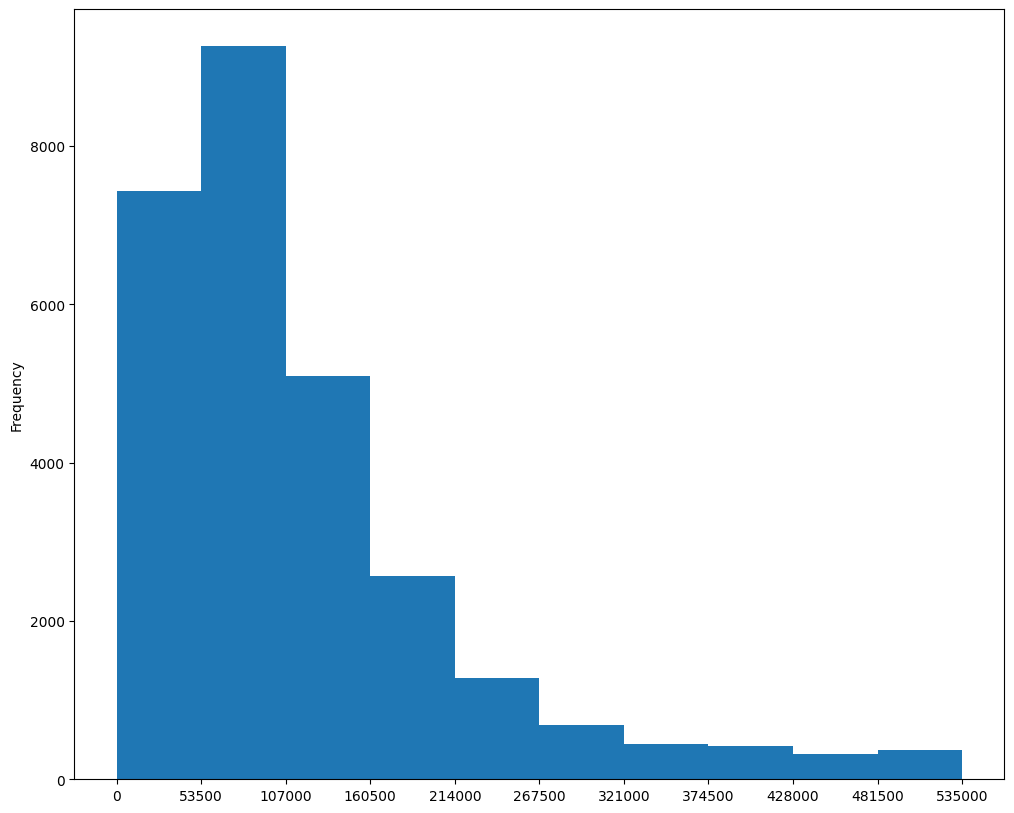

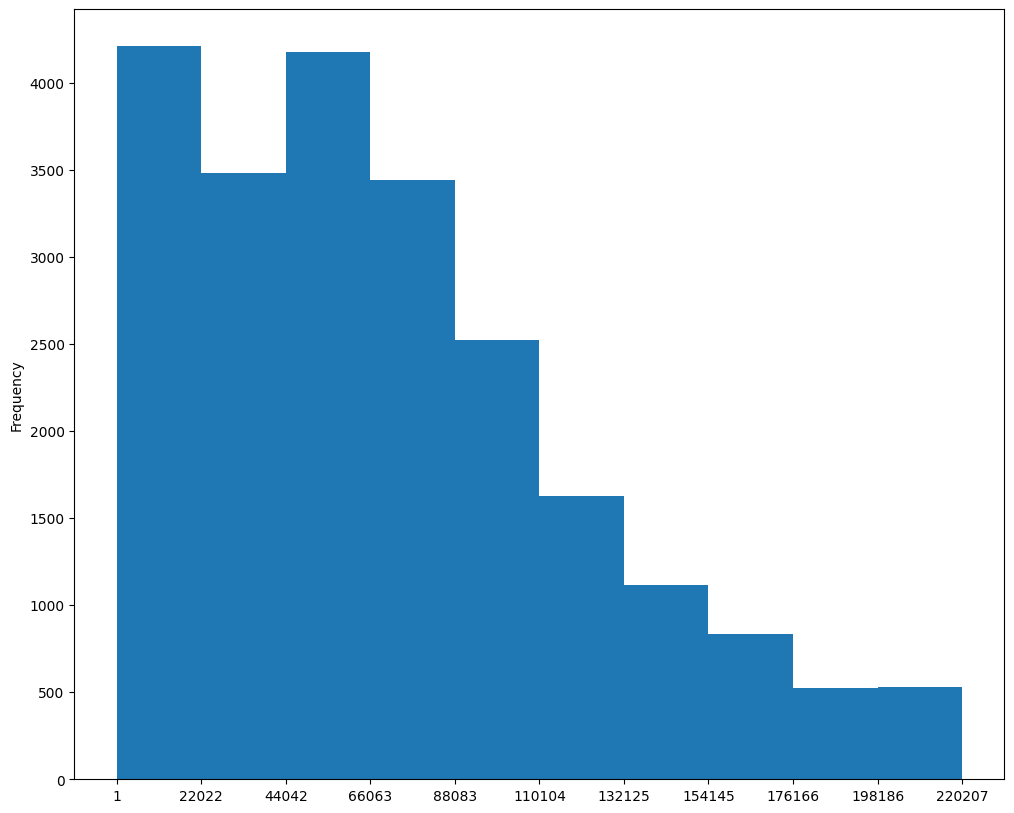

In [76]:
## Write your code here
%matplotlib inline

print(df.columns.values)
# CompTotal and ConvertedCompYearly are two compensation-related columns.

print(df[['CompTotal','ConvertedCompYearly']].dtypes)
# Will use histograms

# COMPTOTAL COLUM

# Remove outliers
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR
CompTotalNoOutliersDf = df[(df['CompTotal'] >= LowerBound) & (df['CompTotal'] <= UpperBound)]

# remove nulls
CompTotalNoOutliersDf = CompTotalNoOutliersDf.dropna(subset=['CompTotal'], axis=0)

# Calculate bin edges
count, bin_edges = np.histogram(CompTotalNoOutliersDf['CompTotal'])

# plot
CompTotalNoOutliersDf['CompTotal'].plot(kind='hist', xticks=bin_edges, figsize=(12,10))
plt.show()

# CONVERTEDCOMPYEARLY COLUMN

# Remove outliers
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR
ConvertedCompYearlyNoOutliersDf = df[(df['ConvertedCompYearly'] >= LowerBound) & (df['ConvertedCompYearly'] <= UpperBound)]

# remove nulls
ConvertedCompYearlyNoOutliersDf = ConvertedCompYearlyNoOutliersDf.dropna(subset=['ConvertedCompYearly'], axis=0)

# Calculate bin edges
count, bin_edges = np.histogram(ConvertedCompYearlyNoOutliersDf['ConvertedCompYearly'])

# plot
ConvertedCompYearlyNoOutliersDf['ConvertedCompYearly'].plot(kind='hist', xticks=bin_edges, figsize=(12,10))
plt.show()

# Most people earn on the lower end of the distribution, up to 100k. The distribution is right skewed.

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
